In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("transformed.csv")
df.head()

,Unnamed: 0,is_duplicate,transformed_question1,transformed_question2,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,0,step step guide invest share market india,step step guide invest share market,65,56,14,12,11,23,...,0.999983,0.999983,0.916659,0.785709,0.0,1.0,93,100,93,100
1,1,0,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,50,87,12,17,8,26,...,0.749981,0.599988,0.699993,0.466664,0.0,1.0,66,74,63,86
2,2,0,increase speed internet connection using vpn,internet speed increased hacking dns,72,58,14,10,4,24,...,0.399992,0.249997,0.399996,0.285712,0.0,1.0,43,46,63,63
3,3,0,mentally lonely solve,find remainder 23 24 math divided 24 23,49,58,12,16,1,22,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9,11,25,28
4,4,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,75,38,15,7,4,21,...,0.999950,0.666644,0.571420,0.307690,0.0,1.0,35,55,47,67


In [14]:
df.shape

(404287, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             404287 non-null  int64  
 1   id                     404287 non-null  int64  
 2   qid1                   404287 non-null  int64  
 3   qid2                   404287 non-null  int64  
 4   question1              404104 non-null  object 
 5   question2              404278 non-null  object 
 6   is_duplicate           404287 non-null  int64  
 7   transformed_question1  404099 non-null  object 
 8   transformed_question2  404211 non-null  object 
 9   q1_len                 404287 non-null  int64  
 10  q2_len                 404287 non-null  int64  
 11  q1_num_words           404287 non-null  int64  
 12  q2_num_words           404287 non-null  int64  
 13  word_common            404287 non-null  int64  
 14  word_total             404287 non-nu

In [15]:
df.isnull().sum()

Unnamed: 0                0
is_duplicate              0
transformed_question1    87
transformed_question2    76
q1_len                    0
q2_len                    0
q1_num_words              0
q2_num_words              0
word_common               0
word_total                0
word_share                0
cwc_min                   0
cwc_max                   0
csc_min                   0
csc_max                   0
ctc_min                   0
ctc_max                   0
last_word_eq              0
first_word_eq             0
fuzz_ratio                0
fuzz_partial_ratio        0
token_sort_ratio          0
token_set_ratio           0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

Unnamed: 0               0
is_duplicate             0
transformed_question1    0
transformed_question2    0
q1_len                   0
q2_len                   0
q1_num_words             0
q2_num_words             0
word_common              0
word_total               0
word_share               0
cwc_min                  0
cwc_max                  0
csc_min                  0
csc_max                  0
ctc_min                  0
ctc_max                  0
last_word_eq             0
first_word_eq            0
fuzz_ratio               0
fuzz_partial_ratio       0
token_sort_ratio         0
token_set_ratio          0
dtype: int64

In [18]:
df.shape

(404146, 23)

In [8]:
!pip install nltk

In [9]:
!pip install gensim

In [10]:
import gensim
print(gensim.__version__)

4.1.2


In [9]:
from nltk import sent_tokenize

In [15]:
new_df = df.sample(1000)

In [24]:
sent = new_df['transformed_question1'].tolist() + new_df['transformed_question2'].tolist()

In [29]:
print(sent[300])

dabba trading


In [ ]:
# corpus = []
# for i in range(0,len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
#     review = review.split()
#     review = ' '.join(review)
#     corpus.append(review)

In [ ]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)

In [ ]:
words

In [14]:
df.duplicated().sum()

0

0    255042
1    149306
Name: is_duplicate, dtype: int64
0    63.074876
1    36.925124
Name: is_duplicate, dtype: float64


<AxesSubplot:>

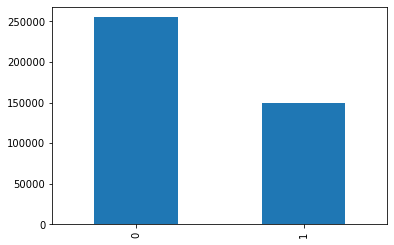

In [15]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [16]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of Unique Question', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of duplicate question',x[x].shape[0])

Number of Unique Question 789795
Number of duplicate question 13698


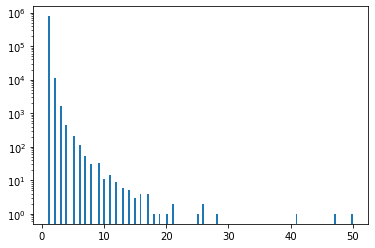

In [17]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')

In [18]:
new_df = df.sample(10000,random_state=2)

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
302477,302477,594007,594008,What are kalman filters used for?,What are examples of filters used in a home?,0
369857,369857,723787,723788,How do Relationship work?,What matters in the life most dignity or money?,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132567,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1


In [25]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [26]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [32]:
!pip install text_hammer

In [35]:
!pip install en_core_web_sm-3.1.0-py3-none-any.whl

Processing c:\users\kisha\music\quora-question-pairs-main\en_core_web_sm-3.1.0-py3-none-any.whl


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\kisha\\Music\\quora-question-pairs-main\\en_core_web_sm-3.1.0-py3-none-any.whl'



In [33]:
import text_hammer as th

ModuleNotFoundError: No module named 'en_core_web_sm'

In [31]:
# %%time

# from tqdm._tqdm_notebook import tqdm_notebook
# tqdm_notebook.pandas()

# def text_preprocessing(df,col_name):
#     column = col_name
#     df[column] = df[column].progress_apply(lambda x:str(x).lower())
#     df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
#     df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
# #     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
#     df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
#     return(df)


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer 

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# after tokenization only
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])


In [ ]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [ ]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head()

In [ ]:
!pip install distance

In [ ]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head()

In [ ]:
!pip install fuzzywuzzy

In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head()

In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

1) drop missing values
2) the 'is_duplicate' is biased towards 0
3) 